In [26]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.pyplot import Figure

#seaborn theme
sns.set_theme(style="whitegrid")

In [9]:
df = pd.read_csv('http://bit.ly/EconomicDataset')
df

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
0,1,1967-06-30,507.8,198712,9.8,4.5,2944
1,2,1967-07-31,510.9,198911,9.8,4.7,2945
2,3,1967-08-31,516.7,199113,9.0,4.6,2958
3,4,1967-09-30,513.3,199311,9.8,4.9,3143
4,5,1967-10-31,518.5,199498,9.7,4.7,3066
...,...,...,...,...,...,...,...
473,474,2006-11-30,9478.5,301070,-1.1,7.3,6849
474,475,2006-12-31,9540.3,301296,-0.9,8.1,7017
475,476,2007-01-31,9610.6,301481,-1.0,8.1,6865
476,477,2007-02-28,9653.0,301684,-0.7,8.5,6724


In [10]:
df.dtypes

Unnamed: 0      int64
date           object
pce           float64
pop             int64
psavert       float64
uempmed       float64
unemploy        int64
dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'])
df

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
0,1,1967-06-30,507.8,198712,9.8,4.5,2944
1,2,1967-07-31,510.9,198911,9.8,4.7,2945
2,3,1967-08-31,516.7,199113,9.0,4.6,2958
3,4,1967-09-30,513.3,199311,9.8,4.9,3143
4,5,1967-10-31,518.5,199498,9.7,4.7,3066
...,...,...,...,...,...,...,...
473,474,2006-11-30,9478.5,301070,-1.1,7.3,6849
474,475,2006-12-31,9540.3,301296,-0.9,8.1,7017
475,476,2007-01-31,9610.6,301481,-1.0,8.1,6865
476,477,2007-02-28,9653.0,301684,-0.7,8.5,6724


In [14]:
df = df.drop('Unnamed: 0', axis=1)

In [15]:
df.dtypes

date        datetime64[ns]
pce                float64
pop                  int64
psavert            float64
uempmed            float64
unemploy             int64
dtype: object

In [16]:
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-06-30,507.8,198712,9.8,4.5,2944
1,1967-07-31,510.9,198911,9.8,4.7,2945
2,1967-08-31,516.7,199113,9.0,4.6,2958
3,1967-09-30,513.3,199311,9.8,4.9,3143
4,1967-10-31,518.5,199498,9.7,4.7,3066
...,...,...,...,...,...,...
473,2006-11-30,9478.5,301070,-1.1,7.3,6849
474,2006-12-31,9540.3,301296,-0.9,8.1,7017
475,2007-01-31,9610.6,301481,-1.0,8.1,6865
476,2007-02-28,9653.0,301684,-0.7,8.5,6724


In [17]:
# year column
df['year'] = df['date'].dt.year
df

,date,pce,pop,psavert,uempmed,unemploy,year
0,1967-06-30,507.8,198712,9.8,4.5,2944,1967
1,1967-07-31,510.9,198911,9.8,4.7,2945,1967
2,1967-08-31,516.7,199113,9.0,4.6,2958,1967
3,1967-09-30,513.3,199311,9.8,4.9,3143,1967
4,1967-10-31,518.5,199498,9.7,4.7,3066,1967
...,...,...,...,...,...,...,...
473,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006
474,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006
475,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007
476,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007


In [19]:
encoder = OrdinalEncoder()

df['year_encoded'] = encoder.fit_transform(df[['year']])
df

,date,pce,pop,psavert,uempmed,unemploy,year,year_encoded
0,1967-06-30,507.8,198712,9.8,4.5,2944,1967,0.0
1,1967-07-31,510.9,198911,9.8,4.7,2945,1967,0.0
2,1967-08-31,516.7,199113,9.0,4.6,2958,1967,0.0
3,1967-09-30,513.3,199311,9.8,4.9,3143,1967,0.0
4,1967-10-31,518.5,199498,9.7,4.7,3066,1967,0.0
...,...,...,...,...,...,...,...,...
473,2006-11-30,9478.5,301070,-1.1,7.3,6849,2006,39.0
474,2006-12-31,9540.3,301296,-0.9,8.1,7017,2006,39.0
475,2007-01-31,9610.6,301481,-1.0,8.1,6865,2007,40.0
476,2007-02-28,9653.0,301684,-0.7,8.5,6724,2007,40.0


In [20]:
ind_var = df[['pce', 'pop', 'psavert', 'uempmed', 'year_encoded']]

ind_var.corr()

,pce,pop,psavert,uempmed,year_encoded
pce,1.000000,0.987967,-0.927122,0.514586,0.974156
pop,0.987967,1.000000,-0.890866,0.549411,0.996093
psavert,-0.927122,-0.890866,1.000000,-0.361530,-0.864474
uempmed,0.514586,0.549411,-0.361530,1.000000,0.552111
year_encoded,0.974156,0.996093,-0.864474,0.552111,1.000000


<AxesSubplot:xlabel='year'>

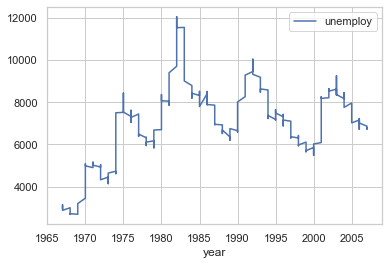

In [34]:
df.plot(x='year', y='unemploy')

<AxesSubplot:xlabel='pop', ylabel='unemploy'>

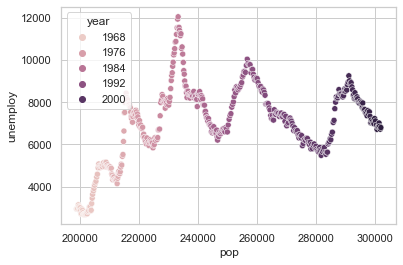

In [32]:
sns.scatterplot(data = df, x='pop', y='unemploy', hue='year')

In [37]:
X = df[['pce', 'pop', 'psavert', 'uempmed', 'year_encoded']].values
y = df['unemploy']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
ridge = Ridge(alpha=0.01)

ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [40]:
y_pred = ridge.predict(X_test)

ridge_df = pd.DataFrame({'OG' : y_test, 'pred' : y_pred})
ridge_df

,OG,pred
15,2689,2992.824165
124,6815,6741.752720
188,11408,10552.368272
155,8098,6944.309649
378,5976,6605.235823
...,...,...
313,8763,8423.325373
415,8215,7879.281548
107,7322,7313.400544
170,8230,7947.935034


In [41]:
print('RMSE is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE is :  651.358488226024


In [42]:
# Compare with linear

linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred_lin = linear.predict(X_test)

print('RMSE is : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

RMSE is :  651.3604924009056
